<a href="https://colab.research.google.com/github/rebsfeitosa/airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Florence*





O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Airbnb é uma plataforma de locação de espaços e aquisição de experiências ao redor do mundo. Por meio da plataforma é possível alugar um quarto em uma casa de moradores da cidade, alugar uma casa inteira, um chalé, barraca em camping, trailer, veleiro, castelo e mais uma série de acomodações. Além de contratar passeios, como trilhas, mergulhos etc. 

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florença, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Florence (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/italy/toscana/florence/2021-07-12/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](http://data.insideairbnb.com/italy/toscana/florence/2021-07-12/visualisations/listings.csv) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/italy/toscana/florence/2021-07-12/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* **id** - número de id gerado para identificar o imóvel
* **name** - nome da propriedade anunciada
* **host_id** - número de id do proprietário (anfitrião) da propriedade
* **host_name** - Nome do anfitrião
* **neighbourhood_group** - esta coluna não contém nenhum valor válido
* **neighbourhood** - nome do bairro
* **latitude** - coordenada da latitude da propriedade
* **longitude** - coordenada da longitude da propriedade
* **room_type** - informa o tipo de quarto que é oferecido
* **price** - preço para alugar o imóvel
* **minimum_nights** - quantidade mínima de noites para reservar
* **number_of_reviews** - número de reviews que a propriedade possui
* **last_review** - data do último review
* **reviews_per_month** - quantidade de reviews por mês
* **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* **availability_365** - número de dias de disponibilidade dentro de 365 dias


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para começar é importante verificar a quantidade de entradas e variáveis do *dataset* e entender o tipo de dado que cada coluna contém. 
Esse *dataset* é uma versão resumida do conjunto de dados do Airbnb. Na página que baixamos o arquivo, é possível encontrar a versão completa. 

In [22]:
# identificar o volume de dados do DataFrame
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])
# verificar as 5 primeiras entradas do dataset
df.head()

Dimensões do Dataset 
Variáveis:  16 
Entradas:  11364


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.05,4,365
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2010-10-22,0.11,4,365
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,135,2,0,NaN,NaN,4,365
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,365
4,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,65,1,119,2019-12-20,1.19,26,301


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


Um dos problemas mais comuns que podemos enfrentar na limpeza e exploração de dados é lidar com os valores ausentes. 
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* Um quarto das entradas das variáveis `reviews_per_month` e `last_review` estão nulas.
* A variável`host_name` tem aproximadamente 2% dos valores nulos.

In [23]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.239616
last_review                       0.239616
host_name                         0.021999
name                              0.000176
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

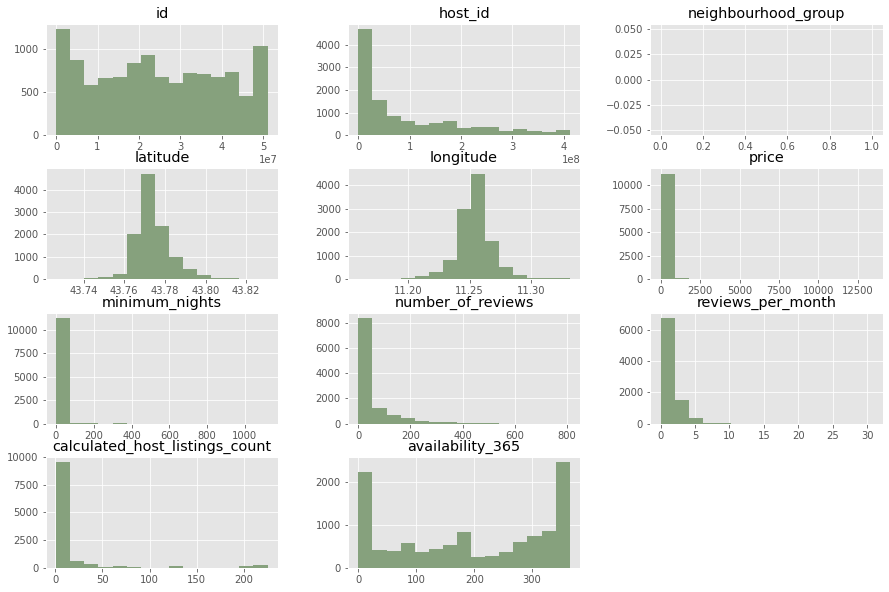

In [24]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15, 10), color='#86a17d');
plt.style.use('ggplot')

### **Q4. Localizando outliers**


Entender os *outliers* é fundamental em uma análise de dados pois os *outliers* podem distorcer todo o resultado de uma análise. Também é possível que o comportamento dos *outliers* pode ser justamente o que está sendo procurado.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem um padrão de distruibuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [25]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11364.000000,11364.000000,11364.000000,8641.000000,11364.000000,11364.000000
mean,123.614836,4.203010,47.227473,1.240854,16.666315,193.954153
std,295.984475,27.114083,80.483928,1.391153,43.609462,135.842823
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,54.000000,1.000000,1.000000,0.210000,1.000000,61.000000
50%,77.000000,2.000000,10.000000,0.760000,3.000000,193.000000
75%,118.000000,3.000000,58.000000,1.870000,8.000000,331.000000
max,13396.000000,1120.000000,812.000000,30.710000,225.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 118, porém seu valor máximo é 13396.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

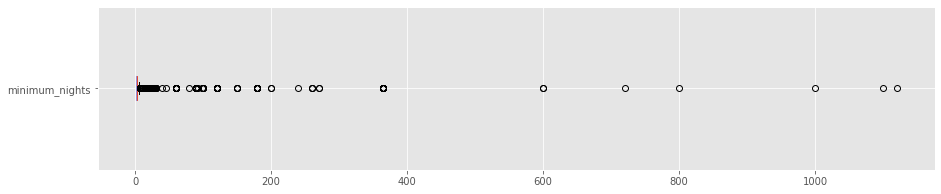

minimum_nights: valores acima de 30:
94 entradas
0.8272%


In [26]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

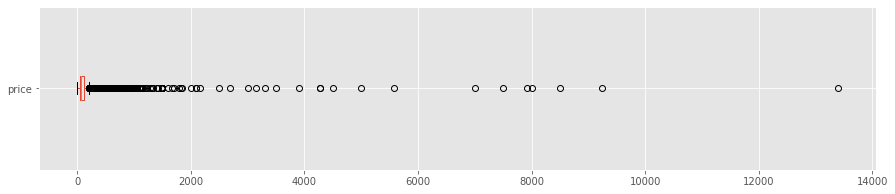


price: valores acima de 1500
29 entradas
0.2552%


In [27]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

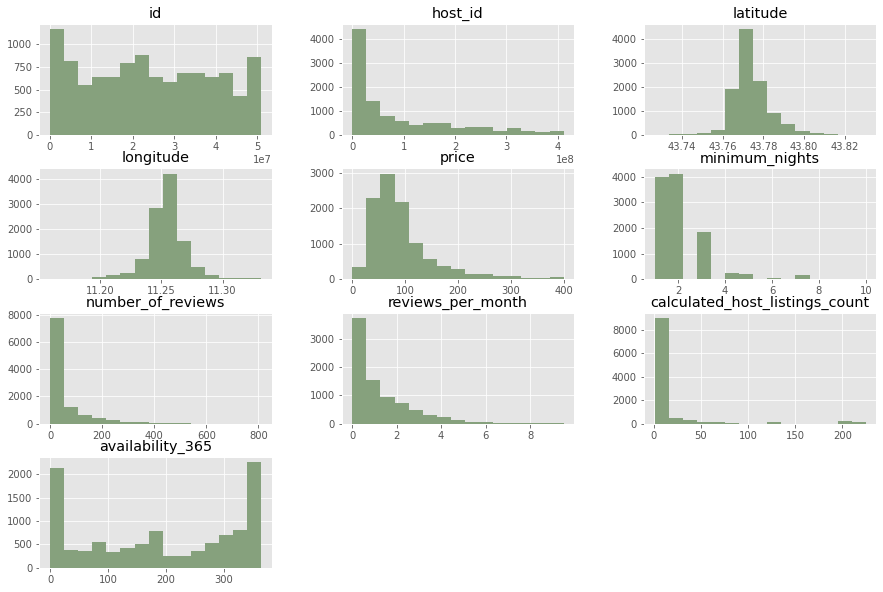

In [30]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color='#86a17d');

### **Q5. Qual a média dos preços de aluguel?**

Agora que os *outliers* da coluna de preço foram eliminados, vamos identificar a média do preço dos aluguéis.


A média aritmética é usada como medida de tendência central, ou seja, como forma de, por meio de um único número, dar uma ideia das características de determinado grupo de números, nesse caso um grupo de valores.

In [31]:
# ver a média da coluna `price``
mean_price = df_clean['price'].mean()
print('Média dos preços de aluguel:',mean_price)

Média dos preços de aluguel: 93.97523452157598


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [32]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025342,-0.133860,-0.112663,0.227080,0.106961
minimum_nights,0.025342,1.000000,-0.025146,-0.118820,-0.140249,-0.041090
number_of_reviews,-0.133860,-0.025146,1.000000,0.830697,-0.123449,0.017323
reviews_per_month,-0.112663,-0.118820,0.830697,1.000000,-0.110569,0.025348
calculated_host_listings_count,0.227080,-0.140249,-0.123449,-0.110569,1.000000,0.038888
availability_365,0.106961,-0.041090,0.017323,0.025348,0.038888,1.000000


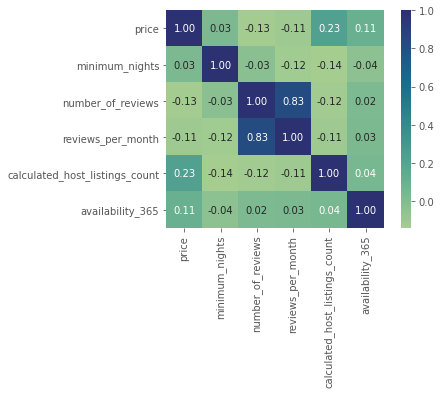

In [33]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='crest', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [34]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean['room_type'].value_counts()

Entire home/apt    7991
Private room       2429
Hotel room          206
Shared room          34
Name: room_type, dtype: int64

In [36]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean['room_type'].value_counts() / df_clean['room_type'].shape[0] 

Entire home/apt    0.749625
Private room       0.227861
Hotel room         0.019325
Shared room        0.003189
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [37]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Centro Storico       101.721480
Gavinana Galluzzo     95.706024
Campo di Marte        73.548638
Isolotto Legnaia      68.360691
Rifredi               61.686869
Name: price, dtype: float64

Acima, vemos que bairros como Centro Storico , Gavinana Galluzzo, Campo di Marte estão com maior média de preço. 



**Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.**

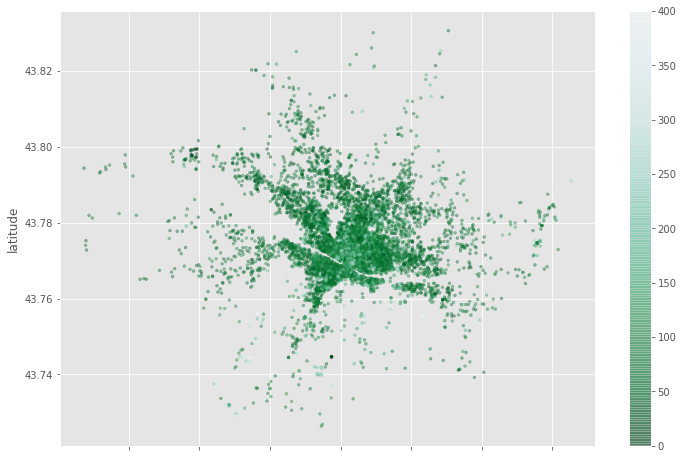

In [38]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('BuGn_r'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Agora que os *outliers* da coluna de *minimum_nights* foram eliminados, vamos identificar a média do mínimo de noites dos aluguéis.


A média aritmética é usada como medida de tendência central, ou seja, como forma de, por meio de um único número, dar uma ideia das características de determinado grupo de números.

In [39]:
# ver a média da coluna `minimum_nights``
minnoites_mean = df_clean['minimum_nights'].mean()
print('Média do mínimo de noites de um aluguel:', minnoites_mean)

Média do mínimo de noites de um aluguel: 2.016510318949343


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Foi possível identificar que a preferência de aluguel é de casas/apartamentos privativos (praticamente o triplo da quantidade de aluguéis de quartos).
Encontramos também a média dos preços de aluguéis em Florença e da quantidade mínima de noites por aluguel. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.